TIME DEPENDENT SCHRONDINGER EQUATION USING FINITE DIFFERENCE METHOD

I choose a discrete grid with spacing $\Delta x$ and $\Delta t$ and let $\psi_j^{m} = \psi(j\Delta x, m\Delta t)$

$$i\frac{\psi_{j}^{m+1} - \psi_{j}^{m}}{\Delta t} = - \frac{1}{2}\frac{\psi_{j+1}^{m} -2\psi_j^m + \psi_{j-1}^{m}}{\Delta x^2} +V(x)\psi_j^m$$ 

Rearrange the equation

$$\psi_{j}^{m+1} = \psi_j^m + \frac{i}{2}\frac{\Delta t}{\Delta x^2}\left(\psi_{j+1}^{m} -2\psi_j^m + \psi_{j-1}^{m}\right) - i \Delta tV(x)\psi_j^m$$ 
Find the $\psi_j$ and $E_j$'s that satisfy

$$ -\frac{1}{2}\frac{\partial^2}{\partial x^2}\psi + V(x) \psi = E\psi$$

And then

$$\psi(x,t) = \sum_{j=0}^\infty c_j \psi_j(x) e^{-i E_j t} \hspace{20mm} c_j = \int_{-\infty}^{\infty} \psi(x, 0)\psi_j^*(x) dx$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import jit
from scipy.linalg import eigh_tridiagonal

In [6]:
#DEFINING ALL PARAMETERS

In [8]:
Nt = 100000
Nx = 301
dx = 1/(Nx-1)
dt = 1e-7

x = np.linspace(0, 1, Nx)
syi0 = np.sqrt(2)*np.sin(np.pi*x)
mu, sigma = 1/2, 1/20
V = -1e4*np.exp(-(x-mu)**2/(2*sigma**2))

$dt/dx^2$ (this parameter should be small for the finite difference method to work).

In [11]:
dt/dx**2

0.008999999999999998

The (dimensionless) potential we examine here is

$$V(x) = -10^4 \exp{\left(\frac{-(x-L/2)^2}{2(L/20)^2}\right)}$$

which is essentially just a normal curve which can be specified more simply as $V(x) = -n(x, \mu=L/2, \sigma=L/20)$

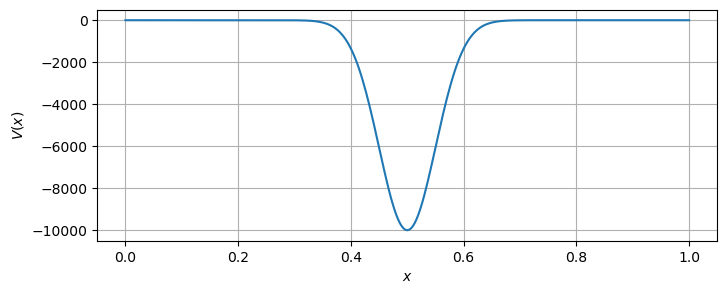

In [17]:
plt.figure(figsize=(8,3))
plt.plot(x,V)
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.grid()
plt.show()

Construct the array of $\psi(x,t)$ (two dimensions: one for $x$ and one for $t$)

In [22]:
syi = np.zeros([Nt,Nx])
syi[0] = syi0

Numba algorithm to implement the finite difference method

In [31]:
@numba.jit("c16[:,:](c16[:,:])", nopython=True, nogil=True)
def compute_syi(syi):
    for t in range(0, Nt-1):
        for i in range(1, Nx-1):
            syi[t+1][i] = syi[t][i] + 1j/2 * dt/dx**2 * (syi[t][i+1] - 2*syi[t][i] + syi[t][i-1]) - 1j*dt*V[i]*syi[t][i]
        
        normal = np.sum(np.absolute(syi[t+1])**2)*dx
        for i in range(1, Nx-1):
            syi[t+1][i] = syi[t+1][i]/normal
        
    return syi

Compute $\psi(x,t)$ using finite difference method(hence the label fdm)

In [41]:
syi_fdm = compute_syi(syi.astype(complex))

Plot for some given $m=10000$ (the dimensionless time is $t=m\Delta t$)

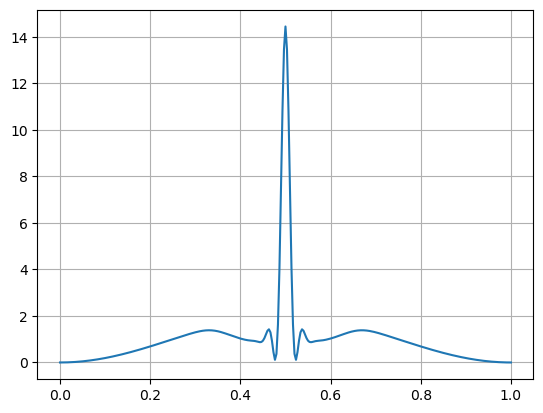

In [44]:
plt.plot(x, np.absolute(syi_fdm[10000])**2)
plt.grid()
plt.show()